## Load df

In [1]:
import pandas as pd
import os
import numpy as np

In [2]:
project_dir = os.path.relpath(os.path.join(os.getcwd(), os.pardir))
features_dir = os.path.join(project_dir, "features")

#TODO: argument for dataset folder name
dataset_dir = os.path.join(features_dir, "music_audio_benchmark")

csv_file_name = "features.csv"
csv_file_path = os.path.join(dataset_dir, csv_file_name)

In [3]:
print("=== ORIGINAL DF ===")
df = pd.read_csv(csv_file_path)
display(df.head())

feature_columns =[
        'name', 'duration', 'tempo', 
        'chroma_key', 'mean_root_square_mean', 'mean_zero_crossing_rate', 
        'mean_spectral_centroid', 'mean_spectral_bandwith', 'mean_spectral_roll_off', 
        'label'
    ]

print("=== FEATURES ===")
df_features = df[feature_columns].copy()
display(df_features.head())

path_columns = [
    'name',
    'path', 'path_spectogram_img', 'path_spectogram_arr', 
    'path_mel_spectogram_img', 'path_mel_spectogram_arr', 'path_chromagram_img',
    'path_chromagram_arr', 'path_mfccs_arr', 'label'
]

print("=== PATHS ===")
df_paths = df[path_columns].copy()
display(df_paths.head())

=== ORIGINAL DF ===


,name,duration,tempo,chroma_key,mean_root_square_mean,mean_zero_crossing_rate,mean_spectral_centroid,mean_spectral_bandwith,mean_spectral_roll_off,path,path_spectogram_img,path_spectogram_arr,path_mel_spectogram_img,path_mel_spectogram_arr,path_chromagram_img,path_chromagram_arr,path_mfccs_arr,label
0,50_Minutes-Colours,10.057,76.000,B,0.190,0.022,1655.830,2608.513,3622.496,C:\users\user\studia\audio_clustering_autoenco...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,alternative
1,50_Minutes-Nightwalk,10.057,123.047,F,0.118,0.017,866.198,1545.713,1512.838,C:\users\user\studia\audio_clustering_autoenco...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,alternative
2,50_Minutes-The_Great_Wall,10.057,132.512,C,0.203,0.024,1402.899,2211.316,2953.923,C:\users\user\studia\audio_clustering_autoenco...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,alternative
3,Abigail_Lapell-Dress_Rehearsal,10.057,143.555,G,0.123,0.045,2218.057,2839.679,4639.921,C:\users\user\studia\audio_clustering_autoenco...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,alternative
4,Albino_Catfish-Ice_Cream,10.057,132.512,C#,0.153,0.074,2667.951,2712.802,5195.016,C:\users\user\studia\audio_clustering_autoenco...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,alternative


=== FEATURES ===


,name,duration,tempo,chroma_key,mean_root_square_mean,mean_zero_crossing_rate,mean_spectral_centroid,mean_spectral_bandwith,mean_spectral_roll_off,label
0,50_Minutes-Colours,10.057,76.000,B,0.190,0.022,1655.830,2608.513,3622.496,alternative
1,50_Minutes-Nightwalk,10.057,123.047,F,0.118,0.017,866.198,1545.713,1512.838,alternative
2,50_Minutes-The_Great_Wall,10.057,132.512,C,0.203,0.024,1402.899,2211.316,2953.923,alternative
3,Abigail_Lapell-Dress_Rehearsal,10.057,143.555,G,0.123,0.045,2218.057,2839.679,4639.921,alternative
4,Albino_Catfish-Ice_Cream,10.057,132.512,C#,0.153,0.074,2667.951,2712.802,5195.016,alternative


=== PATHS ===


,name,path,path_spectogram_img,path_spectogram_arr,path_mel_spectogram_img,path_mel_spectogram_arr,path_chromagram_img,path_chromagram_arr,path_mfccs_arr,label
0,50_Minutes-Colours,C:\users\user\studia\audio_clustering_autoenco...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,alternative
1,50_Minutes-Nightwalk,C:\users\user\studia\audio_clustering_autoenco...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,alternative
2,50_Minutes-The_Great_Wall,C:\users\user\studia\audio_clustering_autoenco...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,alternative
3,Abigail_Lapell-Dress_Rehearsal,C:\users\user\studia\audio_clustering_autoenco...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,alternative
4,Albino_Catfish-Ice_Cream,C:\users\user\studia\audio_clustering_autoenco...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,alternative


In [4]:
path_arr_columns = [
    'path_spectogram_arr',
    'path_mel_spectogram_arr',
    'path_chromagram_arr',
    'path_mfccs_arr'
]


def load_numpy_array(path):
    return np.load(path)


def calculate_mean(path):
    arr = load_numpy_array(path)
    return np.mean(arr)


def calculate_mean_across_column(path):
    arr = load_numpy_array(path)
    return np.mean(arr, axis=1)

In [5]:
# for column in path_arr_columns:
#     path = df_paths[column][0]
#     n_arr = load_numpy_array(path)
#     print(n_arr.shape)
    
#     mean_n_arr = calculate_mean_across_column(path)
#     print(mean_n_arr.shape)
    
#     if column == 'path_spectogram_arr':
#         print(mean_n_arr)

In [6]:
def get_mean_df():
    mean_df = pd.DataFrame()

    for column in path_arr_columns:
        mean_column_name = column.replace('path', 'mean')
        mean_column_name = mean_column_name.replace('_arr', '')
        mean_df[mean_column_name] = df_paths[column].apply(
            lambda path: calculate_mean(path)
        )

#     print("=== MEAN PATHS ===")
#     print(mean_df)
    return mean_df

def get_mean_by_column_df(column_name):    
    means_series = df_paths[column_name].apply(calculate_mean_across_column) 
    mean_df = pd.DataFrame(means_series.tolist(), index=df_paths.index)
    mean_df.columns = [f'{column_name}_{index}' for index in mean_df.columns]
    return mean_df

In [7]:
# mean_df = get_mean_df()
long_mean_df = get_mean_by_column_df('path_spectogram_arr')
long_mean_df.head()

,path_spectogram_arr_0,path_spectogram_arr_1,path_spectogram_arr_2,path_spectogram_arr_3,path_spectogram_arr_4,path_spectogram_arr_5,path_spectogram_arr_6,path_spectogram_arr_7,path_spectogram_arr_8,path_spectogram_arr_9,...,path_spectogram_arr_1015,path_spectogram_arr_1016,path_spectogram_arr_1017,path_spectogram_arr_1018,path_spectogram_arr_1019,path_spectogram_arr_1020,path_spectogram_arr_1021,path_spectogram_arr_1022,path_spectogram_arr_1023,path_spectogram_arr_1024
0,-46.693478,-36.710743,-29.138111,-22.230059,-17.215614,-17.934860,-19.566767,-26.293854,-27.989149,-24.999796,...,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0
1,-24.748405,-25.880041,-25.304487,-15.180512,-17.088261,-28.884970,-21.738504,-16.464916,-13.215202,-16.865158,...,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0
2,-22.063433,-27.213539,-28.187662,-23.229757,-24.322437,-20.418894,-18.185106,-17.236507,-18.666929,-20.325787,...,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0
3,-45.041443,-42.370739,-45.480221,-41.805782,-30.245409,-26.902470,-28.525972,-28.460987,-23.027470,-22.242481,...,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0
4,-51.686333,-48.130844,-48.093014,-44.554066,-32.014034,-25.424837,-25.090065,-30.025457,-32.201698,-26.902369,...,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0


In [8]:
def show_df_summary(df):
    # Info
    print("\nDataFrame information:")
    print(df.info())
    print()
    
    # Null value
    print("Null values per column:")
    print(df.isnull().sum())
    print()

    # Shape
    print("\nDataFrame dimensions (rows, columns):")
    print(df.shape)
    print()

    # Column names
    print("\nColumn names:")
    print(df.columns)
    print()

    # Unique values
    print("\nNumber of unique values in each column:")
    print(df.nunique())
    print()

    # Descriptive statistics for numeric columns
    print("\nDescriptive statistics for numeric columns:")
    print(df.describe())
    print()

    # Frequency of unique values in each column
    print("\nFrequency of unique values in each column:")
    for column in df.columns:
        if df[column].dtype == 'object':
            print(f"\n{column}:")
            print(df[column].value_counts())

In [9]:
# show_df_summary(df)

## Prepare data for clustering

In [10]:
from sklearn.preprocessing import MinMaxScaler
import re

In [11]:
def get_features_df(df, df_features):
    df = df_features.drop(columns=['name', 'label', 'mean_spectral_centroid', 'mean_spectral_roll_off'])
    
    unique_chroma_key_values = df['chroma_key'].unique()
    mapping_dict_chroma = {value: index for index, value in enumerate(unique_chroma_key_values)}
    df['chroma_key'] = df['chroma_key'].map(mapping_dict_chroma)

    return df


def concat_df(df, df_to_concat):
    df = pd.concat([df, df_to_concat], axis=1)
    return df


def normalize_features(df):
    columns_to_normalize = []

    feature_columns = get_feature_columns()
    if all(col in df for col in feature_columns):
        columns_to_normalize += feature_columns
        
    mean_columns = get_mean_columns()
    if all(col in df for col in mean_columns):
        columns_to_normalize += mean_columns

    columns_to_normalize += get_long_mean_columns(df)
    
    scaler = MinMaxScaler()
    df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
    
    return df


def normalize_all_features(df):
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df)
    df = pd.DataFrame(scaled_data, columns=df.columns)
    return df


def get_feature_columns():
    return ['duration', 'tempo', 'mean_root_square_mean', 'mean_zero_crossing_rate', 'mean_spectral_bandwith']


def get_mean_columns():
    return ['mean_spectogram', 'mean_mel_spectogram', 'mean_chromagram', 'mean_mfccs']


def get_long_mean_columns(df):
    path_pattern = re.compile(r'^path_.*_arr_.*$') # path_*_arr_
    return [col for col in df.columns if path_pattern.match(col)]


def feature_one_hot_encoding(df, column_name):
    df[column_name] = df[column_name].astype('category')
    df = pd.get_dummies(df, columns=[column_name], dtype=float)
    return df

In [12]:
df_to_cluster = pd.DataFrame()

# df_to_cluster = get_features_df(df_to_cluster, df_features)
# df_to_cluster = concat_df(df_to_cluster, mean_df)
df_to_cluster = concat_df(df_to_cluster, long_mean_df)
df_to_cluster = normalize_features(df_to_cluster)
# df_to_cluster = feature_one_hot_encoding(df_to_cluster, 'chroma_key')

df_to_cluster

,path_spectogram_arr_0,path_spectogram_arr_1,path_spectogram_arr_2,path_spectogram_arr_3,path_spectogram_arr_4,path_spectogram_arr_5,path_spectogram_arr_6,path_spectogram_arr_7,path_spectogram_arr_8,path_spectogram_arr_9,...,path_spectogram_arr_1015,path_spectogram_arr_1016,path_spectogram_arr_1017,path_spectogram_arr_1018,path_spectogram_arr_1019,path_spectogram_arr_1020,path_spectogram_arr_1021,path_spectogram_arr_1022,path_spectogram_arr_1023,path_spectogram_arr_1024
0,0.378441,0.561835,0.665543,0.744847,0.837190,0.823388,0.801770,0.647862,0.666114,0.756775,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
1,0.675340,0.720078,0.722111,0.853681,0.839296,0.636266,0.760218,0.835784,0.936196,0.894469,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
2,0.711666,0.700595,0.679568,0.729414,0.719667,0.780939,0.828205,0.821032,0.836533,0.835891,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
3,0.400792,0.479140,0.424405,0.442630,0.621721,0.670144,0.630354,0.606428,0.756818,0.803448,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
4,0.310892,0.394982,0.385851,0.400201,0.592474,0.695395,0.696093,0.576516,0.589104,0.724571,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1881,0.420520,0.576849,0.720576,0.809041,0.843325,0.858169,0.869373,0.832271,0.863120,0.888749,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
1882,0.458000,0.740428,0.845316,0.906086,0.916654,0.904725,0.878916,0.803188,0.778775,0.855360,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
1883,0.412748,0.580748,0.732327,0.813841,0.886495,0.868541,0.827780,0.749741,0.744837,0.770487,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
1884,0.471585,0.662886,0.816625,0.877908,0.900433,0.895399,0.886824,0.830530,0.797466,0.802238,...,0.002609,0.005676,0.007339,0.005386,0.002594,0.001892,0.00174,0.003098,0.003479,0.003738


In [13]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from itertools import cycle

print(f"Interactive mode: {matplotlib.is_interactive()}")
print(f"matplotlib backend: {matplotlib.rcParams['backend']}")

color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

Interactive mode: False
matplotlib backend: module://matplotlib_inline.backend_inline


In [14]:
def get_correlation_matrix(df):
    # Filter chroma key and path_*_arr_ in correlation analysis
    df_correlation = df.filter(regex='^(?!chroma_key)').filter(regex='^(?!path_.*_arr_.*$)')
    correlation_matrix = df_correlation.corr()
    
    return correlation_matrix, df_correlation


def show_correlation_matrix(correlation_matrix):
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix Heatmap')
    plt.show()

    
def show_correlation_pairs(df_correlation):
    sns.pairplot(df_correlation)
    plt.show()

In [15]:
# correlation_matrix, df_correlation = get_correlation_matrix(df_to_cluster)
# show_correlation(correlation_matrix)

In [16]:
# show_correlation_pairs(df_correlation)

## PCA

In [17]:
from sklearn.decomposition import PCA

In [18]:
def show_explained_variance(df):
    pca = PCA().fit(df)

    plt.rcParams["figure.figsize"] = (12,6)

    fig, ax = plt.subplots()
    xi = np.arange(1, df.shape[1] + 1, step=1)
    y = np.cumsum(pca.explained_variance_ratio_)

    plt.ylim(0.0,1.1)
    plt.plot(xi, y, marker='o', linestyle='--', color='b')

    plt.xlabel('Number of Components')
    plt.xticks(np.arange(0, df.shape[1] + 50, step=50))
    plt.ylabel('Cumulative variance (%)')
    plt.title('The number of components needed to explain variance')

    plt.axhline(y=0.95, color='r', linestyle='-')
    plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

    ax.grid(axis='x')
    plt.show()

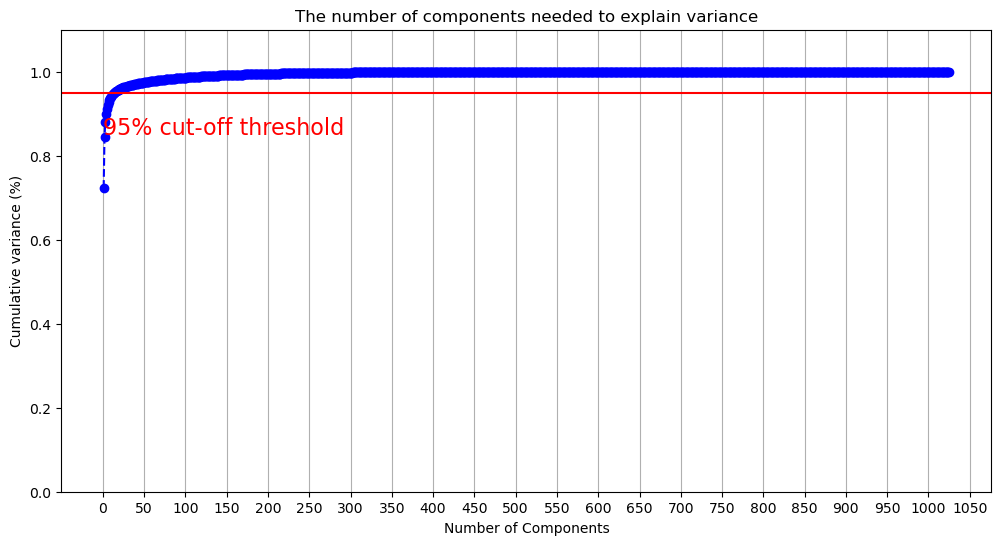

In [19]:
show_explained_variance(df_to_cluster)

In [130]:
def execute_pca(df, n_components=15):
    pca = PCA(n_components=n_components)
    pca.fit(df)

    explained_variance = pca.explained_variance_ratio_
    print("Sum of Explained Variance:", sum(explained_variance))
    
    pca_data = pca.transform(df)
    pca_columns = [f'PCA_{i + 1}' for i in range(n_components)]
    pca_df = pd.DataFrame(data=pca_data, columns=pca_columns)
    return pca_df

In [131]:
pca_df = execute_pca(df_to_cluster, 15)
pca_df

Sum of Explained Variance: 0.9518798319622874


,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,PCA_11,PCA_12,PCA_13,PCA_14,PCA_15
0,4.273132,0.138461,-0.572100,0.226396,-0.069584,-0.087001,0.383374,-0.220467,0.484585,-0.074294,0.122774,0.195082,-0.010421,0.059619,-0.015799
1,6.926404,0.743918,0.652724,-0.009250,0.360249,-0.064912,0.424676,-0.227701,0.525873,-0.261768,-0.017493,-0.093324,0.068109,0.162812,0.021327
2,5.317372,0.191049,0.863392,-0.412955,-0.089955,0.100840,-0.182514,-0.072707,0.399336,-0.014921,-0.016078,0.004830,0.049050,-0.159458,-0.090847
3,3.163725,-0.511323,-0.312654,-0.633994,0.818867,-0.134572,-0.088187,0.537851,-0.957270,-0.533601,0.168628,0.283043,0.120658,0.013590,0.300246
4,0.958429,0.773602,-0.087908,0.098342,0.127274,0.127931,-0.380984,0.126209,-0.167915,0.737594,-0.257094,-0.671587,-0.592232,-0.273560,-0.557767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1881,-2.457482,2.207225,1.353150,-0.592525,-0.437677,0.029584,-0.406583,0.212723,0.286379,-0.162080,0.097995,0.189943,0.170039,0.072546,0.190000
1882,-3.132246,1.065214,-2.708548,-1.470065,-0.793967,0.689708,0.202551,-0.969906,0.038163,-0.009244,-0.201118,-0.590373,0.526762,0.070354,0.049787
1883,-3.823301,0.060091,-0.429577,-0.212606,-0.358355,-0.158541,-0.033188,0.211732,-0.050442,-0.149105,0.001322,-0.112782,0.039022,-0.118645,-0.001047
1884,-7.884085,-0.574803,-0.766112,-0.260379,-0.024790,-0.238406,0.053997,0.327109,-0.311331,-0.013970,-0.339163,-0.271098,-0.076354,-0.047840,0.156302


## Get number of clusters

In [76]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score

### Elbow method

In [57]:
def elbow_method(X, max_clusters, estimator, estimator_params={}):
    inertia = list()
    for i in range(2, max_clusters):
        clusterer = estimator(n_clusters = i, random_state=23, **estimator_params)
        clusterer.fit(X)
        inertia.append(clusterer.inertia_)

    plt.plot(range(2, max_clusters), inertia)
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.show()

=== BEFORE PCA ===


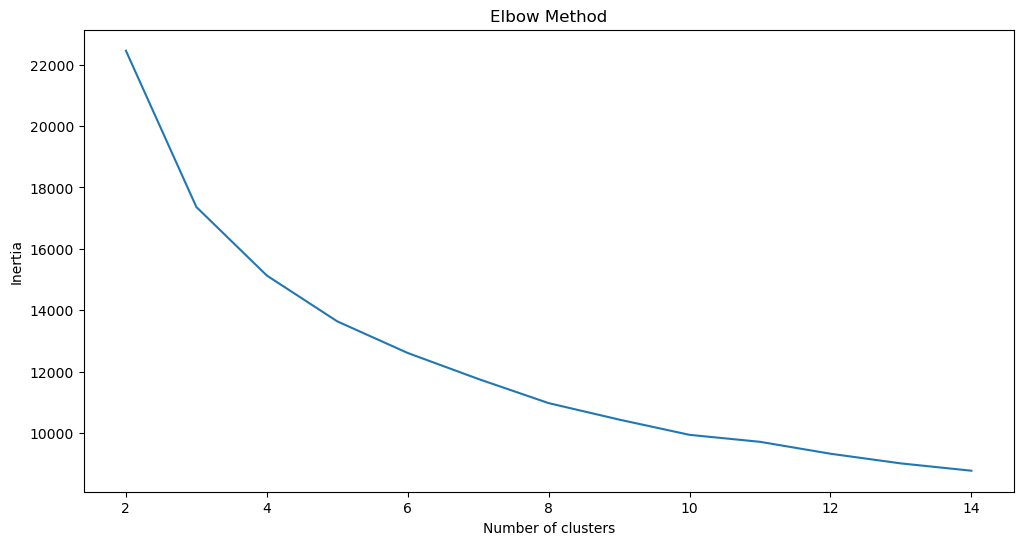

=== AFTER PCA ===


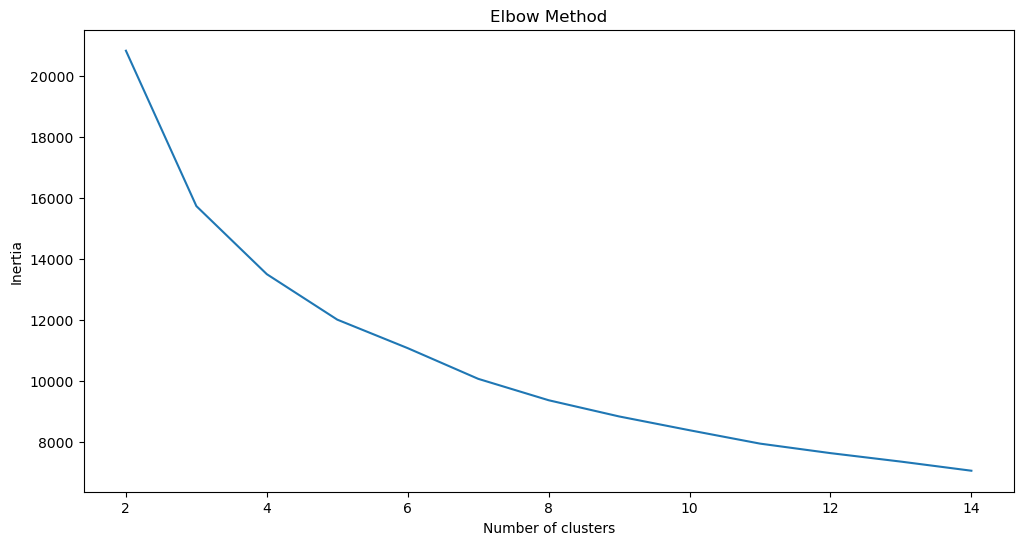

In [58]:
print("=== BEFORE PCA ===")
params = {'n_init': 'auto'}
elbow_method(df_to_cluster, 15, KMeans, params)

print("=== AFTER PCA ===")
elbow_method(pca_df, 15, KMeans, params)

### Silhouette analysis

In [55]:
def silhouette_analysis(X, max_clusters, estimator, estimator_params={}):
    range_n_clusters =  list(range(2, max_clusters + 1))
    
    scores = {}
    
    for n_clusters in range_n_clusters:
        clusterer = estimator(n_clusters=n_clusters, random_state=23, **estimator_params)
        cluster_labels = clusterer.fit_predict(X)

        silhouette_avg = silhouette_score(X, cluster_labels)
        print(f'For n_clusters = {n_clusters}, The average silhouette_score is : {silhouette_avg}')
        scores[n_clusters] = silhouette_avg
        
#         fig, ax1 = plt.subplots()
#         fig.set_size_inches(18, 7)

#         ax1.set_xlim([-0.1, 1])
#         ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
#         sample_silhouette_values = silhouette_samples(X, cluster_labels)

#         y_lower = 10
#         for i in range(n_clusters):
#             ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
#             ith_cluster_silhouette_values.sort()

#             size_cluster_i = ith_cluster_silhouette_values.shape[0]
#             y_upper = y_lower + size_cluster_i

#             color = cm.nipy_spectral(float(i) / n_clusters)
#             ax1.fill_betweenx(
#                 np.arange(y_lower, y_upper),
#                 0,
#                 ith_cluster_silhouette_values,
#                 facecolor=color,
#                 edgecolor=color,
#                 alpha=0.7
#             )

#             ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

#             y_lower = y_upper + 10


#         ax1.set_title(f"The silhouette plot for {n_clusters} clusters.")
#         ax1.set_xlabel("The silhouette coefficient values")
#         ax1.set_ylabel("Cluster label")

#         ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

#         ax1.set_yticks([])
#         ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    #     colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    #     ax2.scatter(
    #         X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    #     )

    #     centers = clusterer.cluster_centers_
    #     ax2.scatter(
    #         centers[:, 0],
    #         centers[:, 1],
    #         marker="o",
    #         c="white",
    #         alpha=1,
    #         s=200,
    #         edgecolor="k",
    #     )

    #     for i, c in enumerate(centers):
    #         ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    #     ax2.set_title("The visualization of the clustered data.")
    #     ax2.set_xlabel("Feature space for the 1st feature")
    #     ax2.set_ylabel("Feature space for the 2nd feature")

    #     plt.suptitle(
    #         "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
    #         % n_clusters,
    #         fontsize=14,
    #         fontweight="bold",
    #     )


#     plt.show()
#     return best_score_clusters, best_score
    return scores

def cv_silhouette_scorer(estimator, X):
    estimator.fit(X)
    cluster_labels = estimator.labels_
    num_labels = len(set(cluster_labels))
    num_samples = len(X.index)
    if num_labels == 1 or num_labels == num_samples:
        return -1
    else:
        return silhouette_score(X, cluster_labels)

In [56]:
# silh_n_clusters, silh_score = silhouette_analysis(pca_df, 15)
# silh_n_clusters, silh_score = silhouette_analysis(df_to_cluster, 15)

esimator_params = {'n_init': 'auto'}
# scores = silhouette_analysis(df_to_cluster, 15, KMeans, esimator_params)
scores = silhouette_analysis(pca_df, 15, KMeans, esimator_params)

sorted_scores = sorted(scores.items(), key=lambda x: x[1], reverse=True)
top_5_n_clusters = [num_clusters for num_clusters, _ in sorted_scores[:5]]

For n_clusters = 2, The average silhouette_score is : 0.41069138050079346
For n_clusters = 3, The average silhouette_score is : 0.3069482147693634
For n_clusters = 4, The average silhouette_score is : 0.24742059409618378
For n_clusters = 5, The average silhouette_score is : 0.23471903800964355
For n_clusters = 6, The average silhouette_score is : 0.20115035772323608
For n_clusters = 7, The average silhouette_score is : 0.21563872694969177
For n_clusters = 8, The average silhouette_score is : 0.20516498386859894
For n_clusters = 9, The average silhouette_score is : 0.21373364329338074
For n_clusters = 10, The average silhouette_score is : 0.19800367951393127
For n_clusters = 11, The average silhouette_score is : 0.19518201053142548
For n_clusters = 12, The average silhouette_score is : 0.18962723016738892
For n_clusters = 13, The average silhouette_score is : 0.1818101555109024
For n_clusters = 14, The average silhouette_score is : 0.1814407855272293
For n_clusters = 15, The average sil

In [49]:
print(sorted_scores)
top_5_n_clusters

[(2, 0.41069138), (3, 0.3069482), (4, 0.2474206), (5, 0.23471904), (7, 0.21563873), (9, 0.21373364), (8, 0.20516498), (6, 0.20115036), (10, 0.19800368), (11, 0.19518201), (12, 0.18962723), (15, 0.1871416), (13, 0.18181016), (14, 0.18144079)]


[2, 3, 4, 5, 7]

## KMeans

In [100]:
from sklearn.model_selection import GridSearchCV

In [101]:
param_grid = {
    'n_clusters': top_5_n_clusters,
    'init': ['k-means++', 'random'],
    'max_iter': [100, 200, 300, 400, 500],
    'tol': [1e-3, 1e-4, 1e-5, 1e-6]
}

In [102]:
kmeans = KMeans(random_state=23, n_init='auto')

grid_search = GridSearchCV(
    estimator=kmeans, 
    param_grid=param_grid, 
    cv=[(slice(None), slice(None))],
    scoring=cv_silhouette_scorer,
    n_jobs=-1
)
grid_search.fit(pca_df)

best_params = grid_search.best_params_
print("Best parameters found:", best_params)
print("Best score:", grid_search.best_score_)

Best parameters found: {'init': 'random', 'max_iter': 100, 'n_clusters': 2, 'tol': 0.0001}
Best score: 0.4776686429977417


In [103]:
kmeans = KMeans(
    random_state=23, 
    n_init='auto',
    init=best_params['init'],
    max_iter=best_params['max_iter'],
    n_clusters=best_params['n_clusters'],
    tol=best_params['tol']
).fit(pca_df)
kmeans.labels_

array([0, 0, 0, ..., 1, 1, 0])

### DBSCAN

In [227]:
# from sklearn.metrics.pairwise import cosine_distances

In [228]:
# cos_dist = cosine_distances(pca_df)

In [239]:
param_grid = {
    'eps': [0.5, 1.0, 1.5],
    'min_samples': [5, 10, 15, 20],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30]
}

In [291]:
dbscan = DBSCAN()

grid_search = GridSearchCV(
    estimator=dbscan, 
    param_grid=param_grid, 
    cv=[(slice(None), slice(None))],
    scoring=cv_silhouette_scorer,
    n_jobs=-1
)
grid_search.fit(pca_df)

best_params = grid_search.best_params_
print("Best parameters found:", best_params)
print("Best score:", grid_search.best_score_)

Best parameters found: {'algorithm': 'auto', 'eps': 1.5, 'leaf_size': 10, 'min_samples': 15}
Best score: 0.20616424083709717


In [301]:
dbscan = DBSCAN(
    eps=1.0,
    min_samples=best_params['min_samples'],
    algorithm=best_params['algorithm'],
    leaf_size=best_params['leaf_size']
).fit(pca_df)

labels = dbscan.labels_

In [302]:
set(labels)

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [303]:
sc = silhouette_score(pca_df, labels)
print("Silhouette Coefficient:%0.2f" % sc)

Silhouette Coefficient:-0.45


In [304]:
pca_to_visualise_df = execute_pca(pca_df, 2)

Sum of Explained Variance: 0.8882893770933151


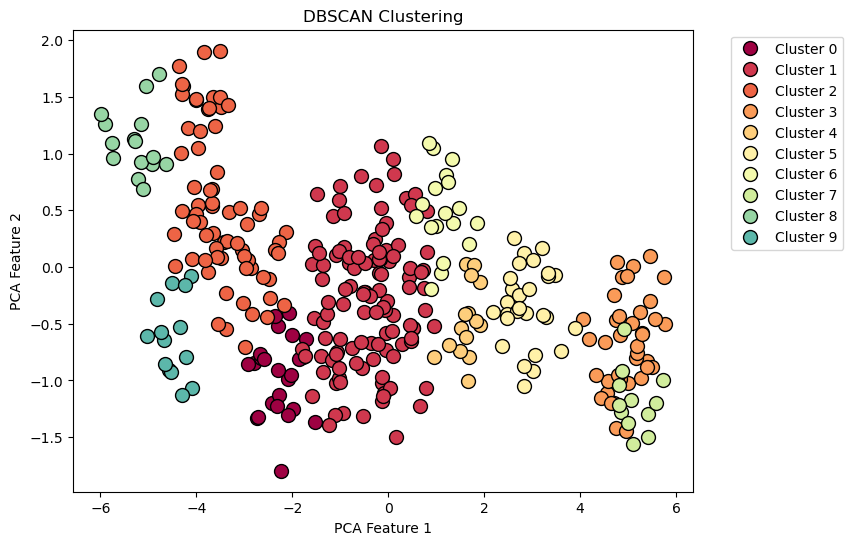

In [313]:
plt.figure(figsize=(8, 6))

unique_labels = set(labels)

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels) + 1)]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise points
#         col = [0, 0, 0, 0.3]
        continue

    class_member_mask = (labels == k)
    
    xy = pca_to_visualise_df[class_member_mask]
    plt.plot(
        xy['PCA_1'], 
        xy['PCA_2'], 
        'o', 
        markerfacecolor=tuple(col),
        markeredgecolor='k', 
        markersize=10,
        label=f'Cluster {k}'
    )

plt.title('DBSCAN Clustering')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()